### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Define path
path = r'C:\Users\Asus\Zomato_restaurant_Bangalore\01 Data\Prepared Data'

In [4]:
# Import the Zomato data

df = pd.read_csv(os.path.join(path, 'df_merged.csv'))

### 2. Data cleaning

In [5]:
df.columns

Index(['Unnamed: 0', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'KGISWardName'],
      dtype='object')

In [6]:
df.drop(columns="Unnamed: 0",inplace=True)

In [7]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'KGISWardName'],
      dtype='object')

In [8]:
df.shape

(23035, 17)

##### Missing values

In [9]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
phone                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
KGISWardName                   0
dtype: int64

##### Duplicates check

In [10]:
dups=df.duplicated()

In [11]:
dups.shape # No dups

(23035,)

In [12]:
df.head()

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),KGISWardName
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",North Indian,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Banashankari Temple ward
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",Asian Food,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Banashankari Temple ward
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,Casual Dining,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",Café,800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,Banashankari Temple ward
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,North and South Indian,300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Banashankari Temple ward
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe",North Indian,600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,Banashankari Temple ward


##### Extreme values checks

C:\Users\Asus\AppData\Local\Temp\ipykernel_27452\2281467657.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["approx_cost(for two people)"], bins=25)


<Axes: xlabel='approx_cost(for two people)', ylabel='Density'>

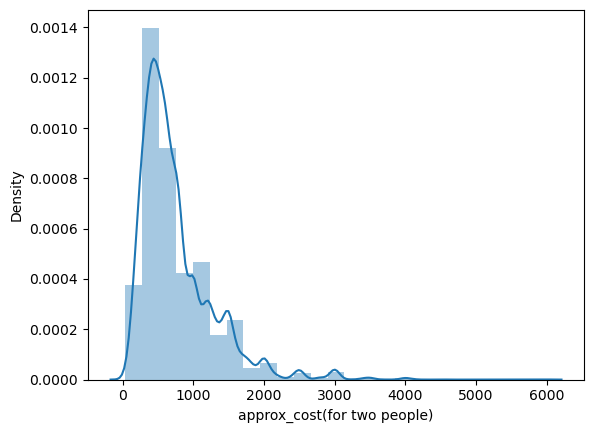

In [13]:
sns.distplot(df["approx_cost(for two people)"], bins=25)

In [14]:
df["approx_cost(for two people)"].mean() # Check the mean

754.2148903841979

In [15]:
df["approx_cost(for two people)"].median() #check for median

600.0

In [16]:
df["approx_cost(for two people)"].max() # check for max

6000.0

### 3. Data prep for regression analysis 

### convert the location using one-hot encoding

In [17]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'KGISWardName'],
      dtype='object')

In [18]:
df["KGISWardName"].value_counts()

KGISWardName
Koramangala                     5218
Yelahanka Satellite Town        1437
BTM Layout                      1401
Whitefield                      1222
Vijayanagara Krishnadevaraya    1041
Agara                           1011
Kempegowda Ward                 1004
Chunchaghatta                    978
Byrasandra                       964
Peenya                           840
J P Nagar                        809
HAL Airport                      745
HSR - Singasandra                730
Marathahalli                     619
Basavanagudi                     594
Kanneshwara Rama                 540
Kammanahalli                     530
Shakthi Ganapathi Nagar          516
Bellanduru                       501
Sagayarapuram                    496
Malleswaram                      492
Rajaji Nagar                     374
Banashankari Temple ward         372
Defence Colony                   319
New Bayappanahalli               282
Name: count, dtype: int64

In [19]:
#For loop used to label the KGISWardName(location)

result= []

for x in df["KGISWardName"]:
    if x=="Koramangala" or x=="BTM Layout" or x== "Chunchaghatta" or x== "J P Nagar" or x== "HSR - Singasandra" or x=="Agara" or x== "Basavanagudi" or x== "Bellanduru" or x=="Banashankari Temple ward" or x=="Defence Colony":
        result.append("south")
    elif x=="Yelahanka Satellite Town" or x== "Kempegowda Ward" or x== "Peenya" or x=="Kanneshwara Rama" or x=="Kammanahalli" or x=="Sagayarapuram" or x== "Malleswaram" or x== "Rajaji Nagar" or x== "New Bayappanahalli" or x=="Shakthi Ganapathi Nagar":
        result.append("north")
    elif x== "Whitefield" or x== "Marathahalli" or x== "Byrasandra" or x== "HAL Airport":
        result.append("east")
    else:
        result.append("west")
        

In [20]:
result

['south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',
 'south',


In [21]:
df["cardinal_directions"]=result

In [22]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'KGISWardName',
       'cardinal_directions'],
      dtype='object')

In [23]:
df.head(10)

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),KGISWardName,cardinal_directions
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",North Indian,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Banashankari Temple ward,south
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",Asian Food,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Banashankari Temple ward,south
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,Casual Dining,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",Café,800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,Banashankari Temple ward,south
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,North and South Indian,300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Banashankari Temple ward,south
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe",North Indian,600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,Banashankari Temple ward,south
5,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8,286,+91 9980040002+91 9980063005,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600.0,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari,Banashankari Temple ward,south
6,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,Yes,Yes,4.6,2556,080 48653961080 48655715,Banashankari,Casual Dining,"Farmhouse Pizza, Chocolate Banana, Virgin Moji...",Café,600.0,"[('Rated 5.0', 'RATED\n I personally really l...",[],Cafes,Banashankari,Banashankari Temple ward,south
7,"1, 30th Main Road, 3rd Stage, Banashankari, Ba...",Penthouse Cafe,Yes,No,4.0,324,+91 8884135549+91 9449449316,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...",Café,700.0,"[('Rated 3.0', ""RATED\n I had been to this pl...",[],Cafes,Banashankari,Banashankari Temple ward,south
8,"2470, 21 Main Road, 25th Cross, Banashankari, ...",Smacznego,Yes,No,4.2,504,+91 9945230807+91 9743804471,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...",Café,550.0,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",[],Cafes,Banashankari,Banashankari Temple ward,south
9,"12,29 Near PES University Back Gate, D'Souza N...",CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...,Yes,No,4.1,402,080 26724489+91 7406048982,Banashankari,Cafe,"Waffles, Pasta, Crispy Chicken, Honey Chilli C...",Café,500.0,"[('Rated 4.0', 'RATED\n We ended up here on a...",[],Cafes,Banashankari,Banashankari Temple ward,south


In [24]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'KGISWardName',
       'cardinal_directions'],
      dtype='object')

#### unique values of categorical variables

In [25]:
## For df checking unique values of categorical variables

for column in df.columns:
    if df[column].dtypes == "object":
        print(column.upper(), ": ", df[column].nunique())
        print(df[column].value_counts().sort_values())
        print("\n")

ADDRESS :  4349
address
30/1, Near Indian Express, Cunningham Road, Bangalore                                     1
Whitefield Last Bus Stop, Whitefield, Bangalore                                           1
12th Floor, Gamma Building, Sigma Soft Tech Park, Varthur Kodi, Whitefield, Bangalore     1
Food Court, Phoenix Market City Mall, Whitefield, Bangalore                               1
Hoodi Circle, ITPL Main Road, Whitefield, Bangalore                                       1
                                                                                         ..
Citrus Hotels, 34, Cunningham Road, Bangalore                                            35
Vivanta By Taj, 41/3, MG Road, Bangalore                                                 35
The Oberoi, 37-39, MG Road, Bangalore                                                    36
The Park Bangalore, 14/7, MG Road, Bangalore                                             38
The Ritz-Carlton, 99, Residency Road, Bangalore         

#### Convert categorical to dummy variables



### Correlation Plot

In [27]:
df2= df[["approx_cost(for two people)", "rate"]]

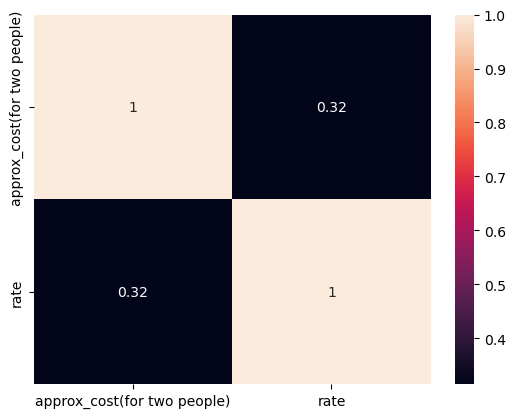

In [29]:
sns.heatmap(df2.corr(), annot=True)
plt.show()

## Train-Test Split

In [31]:
#Copy all the predictor variables into X dataframe
X=df2.drop("approx_cost(for two people)", axis=1)

#copy target into the y dataframe.
y=df2[["approx_cost(for two people)"]]


In [ ]:
X.head()

In [32]:
# Split X and y into training and test set in 75:25 ratio

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=1)

### 4. State your hypothesis: The is no relationship between Approx cost and rate 

In [33]:
X_test

,rate
18414,3.8
7967,3.9
12557,4.2
14370,4.4
17513,4.2
...,...
21549,4.2
7925,3.4
14109,4.1
1766,2.8


In [34]:
y_test

,approx_cost(for two people)
18414,650.0
7967,800.0
12557,400.0
14370,800.0
17513,1000.0
...,...
21549,700.0
7925,500.0
14109,600.0
1766,500.0


### 4. Regression analysis

In [35]:
# Create a regression object.

regression= LinearRegression() # This is the regression object, which will be fit onto the training set.

In [36]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [37]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

In [38]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [39]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[381.11559782]]
Mean squared error:  249881.73748618978
R2 score:  0.09969405489709704


1. The slope here indicates for each change in X (i.e rate) the dependent variable Y(Approx cost) is expected to increase by 381, all else being equal.
2. the MSE on average, the squared difference between the predicted and actual values is substantial. indicating a poor fit. 
3. The R2 score is 0.09 indicates that the regression model explains only a small proportion of the variance in the dependent variable, suggesting that the model may not be adequate for explaining or predicting the observed data effectively.